### POSTTEST 5 - SUPERVISED LEARNING
### Nama   :   Wahyu Harry Saputra Sembiring
### NIM      :    2009106049
### Kelas   :    Informatika A 2020

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv('Sofia_Temperature.csv')
df = df.iloc[:1500]

In [92]:
df.head(10)

,Date_Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition
0,2010-01-01 00:00,55,37,51,W,16,0,27.49,Partly Cloudy
1,2010-01-01 00:30,55,0,41,WSW,27,0,27.52,Partly Cloudy / Windy
2,2010-01-01 01:00,46,41,81,E,7,0,27.69,Fair
3,2010-01-01 01:30,46,39,76,ESE,7,0,27.69,Fair
4,2010-01-01 02:00,46,39,76,ESE,4,0,27.69,Fair
5,2010-01-01 02:30,45,37,76,ESE,7,0,27.69,Fair
6,2010-01-01 03:00,43,39,87,VAR,4,0,27.66,Fair
7,2010-01-01 03:30,45,39,81,SE,4,0,27.66,Fair
8,2010-01-01 04:00,45,37,76,E,7,0,27.63,Fair
9,2010-01-01 04:30,48,39,71,VAR,7,0,27.63,Fair


### Training Data

In [45]:
X = df[["Temperature","Humidity","Wind Speed","Pressure"]]
Y = df['Condition']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Algoritma K-Nearest Neighbour (KNN)

In [27]:
# membentuk model
Modelknn = KNeighborsClassifier(n_neighbors = 5)

In [28]:
Modelknn.fit(X_train, Y_train)

KNeighborsClassifier()

In [53]:
print("Akurasi training set model KNN dengan jumlah neighbors :", round(Modelknn.score(X_train, Y_train),2))
# round()

print("Akurasi test set model KNN dengan jumlah neighbors :",round(Modelknn.score(X_test, Y_test),2))
# round()

Akurasi training set model KNN dengan jumlah neighbors : 0.7
Akurasi test set model KNN dengan jumlah neighbors : 0.71


### Algoritma Naive Bayes

In [30]:
gnb = GaussianNB()

In [31]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [49]:
print("Akurasi training set model NBayes dengan jumlah neighbors :", round(gnb.score(X_train, y_train),2))
print("Akurasi test set model NBayes dengan jumlah neighbors :", round(gnb.score(X_test, y_test),2))

Akurasi training set model NBayes dengan jumlah neighbors : 0.35
Akurasi test set model NBayes dengan jumlah neighbors : 0.35


###  Tampilkan visualisasi dari model-model tersebut untuk Regression

In [33]:
df.head()

,Date_Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition
0,2010-01-01 00:00,55,37,51,W,16,0,27.49,Partly Cloudy
1,2010-01-01 00:30,55,0,41,WSW,27,0,27.52,Partly Cloudy / Windy
2,2010-01-01 01:00,46,41,81,E,7,0,27.69,Fair
3,2010-01-01 01:30,46,39,76,ESE,7,0,27.69,Fair
4,2010-01-01 02:00,46,39,76,ESE,4,0,27.69,Fair


In [58]:
X = df[['Temperature']] # prediktor
Y = df[['Wind Speed']] # target

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
lr = LinearRegression()

In [67]:
lr.fit(X_train, Y_train)

LinearRegression()

In [70]:
print("Nilai R-Squared Data Testing  : ", lr.score(X_test,Y_test))
print("Nilai R-Squared Data Training : ", lr.score(X_train,Y_train))  

Nilai R-Squared Data Testing  :  0.003165739915767962
Nilai R-Squared Data Training :  0.0019438365587327588


In [69]:
y_pred = lr.predict(X_test)

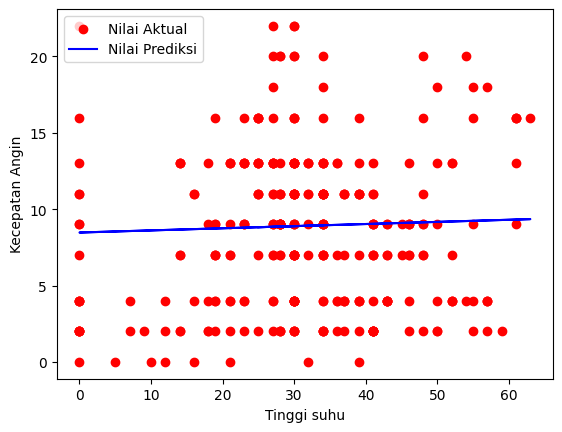

In [44]:
plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test,y_pred, color='blue')
plt.legend(['Nilai Aktual', 'Nilai Prediksi'])
plt.xlabel("Tinggi suhu")
plt.ylabel("Kecepatan Angin")
plt.show()

### Confusion Matrix

In [96]:
X = df[["Temperature","Humidity","Wind Speed","Pressure"]]
Y = df['Condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Modelknn = KNeighborsClassifier(n_neighbors = 5)
Modelknn.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = Modelknn.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred)

array([[ 6,  0,  7,  0, 23,  0,  2,  0],
       [ 0,  0,  1,  0,  2,  0,  0,  0],
       [ 7,  0, 13,  0, 40,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0],
       [29,  0, 34,  0, 89,  0,  4,  0],
       [ 2,  0,  1,  0,  4,  0,  0,  0],
       [ 5,  0,  8,  0, 17,  0,  3,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0]], dtype=int64)

In [74]:
Y.unique()

array(['Partly Cloudy', 'Partly Cloudy / Windy', 'Fair', 'Mostly Cloudy',
       'Fair / Windy', 'Cloudy', 'Cloudy / Windy',
       'Mostly Cloudy / Windy'], dtype=object)

### Regression Eval

In [75]:
X = df[['Temperature']] # prediktor
Y = df[['Wind Speed']] # target

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [79]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [80]:
print("Nilai R-Squared Data Testing  : ", lr.score(X_test,Y_test))
print("Nilai R-Squared Data Training : ", lr.score(X_train,Y_train))  

Nilai R-Squared Data Testing  :  -0.0018020654088461985
Nilai R-Squared Data Training :  0.0023061297328489383


In [82]:
pred = lr.predict(X_test)

In [84]:
rmse = mean_squared_error(Y_test,pred, squared=False)
print("Nilai RMSE :", round(rmse,2))

Nilai RMSE : 5.04


### Hyperparameter Tunning

In [85]:
X = df[["Temperature","Humidity","Wind Speed","Pressure"]]
Y = df['Condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Modelknn = KNeighborsClassifier(n_neighbors = 5)
Modelknn.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
param = {
    "n_neighbors" : [i for i in range(10)]
}

In [90]:
gsc = GridSearchCV(estimator = Modelknn,param_grid = param,scoring ='accuracy', n_jobs = -1 )

In [91]:
gsc.fit(X_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\L

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')